In [35]:
from SimPEG import Utils
from SimPEG.Utils import mkvc
import SimPEG.PF as PF
import numpy as np
import scipy as sp
import re
import matplotlib.pyplot as plt
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.gx as gx
from matplotlib.patches import Rectangle
gxc = gx.GXpy()

In [66]:
# workDir = 'C:\\Users\\DominiqueFournier\\Desktop\\Search_mag_data\\'
# fname = 'Search_reduced_columns.csv'

# workDir = 'C:\\Users\DominiqueFournier\\Dropbox\\MDRU_GIF_shared_files\\GBC_Search_grd\\'
# fName = 'Enhanced_Mag_UTM09_GSC.GRD'

workDir =r"C:\Users\DominiqueFournier\Downloads\AnomalousMagneticField_updatedApr17"
fName = '\MAG_UTM09.grd'

Corners for cropping data (NAD 83, Zone 9)
SW 649000 E, 6049000 N
NE 690000 E, 6090000 N

If too large, this one is slightly smaller
SW 656000 E, 6050000 N
NE 686000 E, 6082000 N



In [144]:
# with gxgrd.Grid(workDir+fName) as grid:
#     extent = grid.extent_2d()
g = gxgrd.Grid.open(workDir + fName)

In [150]:
np.array([0,2,1,3], dtype='int')

array([0, 2, 1, 3])

In [149]:
extent_2d[np.array([0,2,1,3], dtype='int')]

TypeError: only integer scalar arrays can be converted to a scalar index

In [90]:
# get the grid extent and coordinate system from which we will create a default map named after the grid
# do this in a separate `with...` as the Aggregate_group class needs access to the grid file.
with gxgrd.Grid(workDir + fName) as grid:

    extent = grid.extent_2d()
    coordinate_system = grid.coordinate_system
    data_values = grid.xyzv()[:, :, 3]
    nx, ny = grid.nx, grid.ny
    dx, dy = grid.dx, grid.dy
#     extent_2d = grid.extent_2d()
    x0, y0 = grid.x0, grid.y0

vectorCCx, vectorCCy = np.asarray(range(nx))*dx+x0,np.asarray(range(ny))*dy+y0 
extent = np.r_[vectorCCx[0], vectorCCx[-1], vectorCCy[0], vectorCCy[-1]]

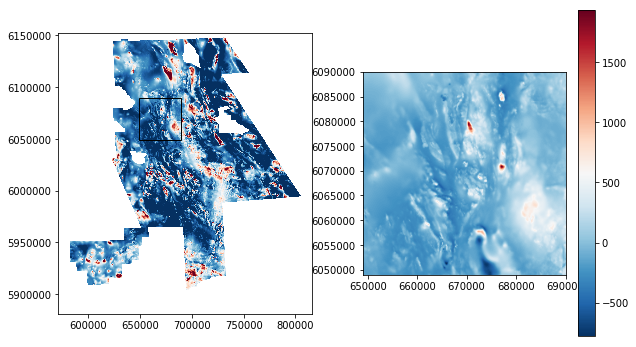

In [140]:
lims = np.r_[649000, 690000, 6049000, 6090000]
# lims = np.r_[np.c_[2500000, 4500000], np.c_[3000000, 5000000]]
             
fig, axs = plt.figure(figsize=(10,6)), plt.subplot(1,2,1)

plt.imshow(data_values, extent=extent, origin='lower', cmap='RdBu_r', vmin=-200, vmax=800)

axs.add_patch(Rectangle((lims[0], lims[2]),
                               lims[1]-lims[0],
                               lims[3]-lims[2],
                               facecolor='none', edgecolor='k'))


# Extract data within window and plot
indx = (vectorCCx > lims[0]) * (vectorCCx < lims[1])
indy = (vectorCCy > lims[2]) * (vectorCCy < lims[3])

subData = data_values[:, indx]
subData = subData[indy, :]
# fig, 
axs = plt.subplot(1,2,2)

plt.imshow(subData, extent=lims, origin='lower', cmap='RdBu_r')
plt.colorbar()

In [5]:
# def progress(iter, prog, final):
#     """
#     progress(iter,prog,final)

#     Function measuring the progress of a process and print to screen the %.
#     Useful to estimate the remaining runtime of a large problem.

#     Created on Dec, 20th 2015

#     @author: dominiquef
#     """
#     arg = np.floor(float(iter)/float(final)*10.)

#     if arg > prog:

#         print("Done " + str(arg*10) + " %")
#         prog = arg

#     return prog

# dataMat = []
# count = -1
# for ii, line in enumerate(dtaMat):
#     lst = re.findall('\d*\.\d*', line)
    
#     if len(lst) == 6:
#         dataMat.append([float(i) for i in lst])
        
#     count = progress(ii, count, len(dtaMat))

Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %


In [16]:
# Sub sample to Dianne's extent
# lims = np.r_[np.c_[649000, 6049000],
# np.c_[690000, 6090000]]
lims = np.r_[np.c_[649000, 6049000],
np.c_[690000, 6090000]]

ind = (dataMat[:,4] > lims[0,0]) *(dataMat[:,4] < lims[1,0])*(dataMat[:,5] > lims[0,1])*(dataMat[:,5] < lims[1,1])

subset = dataMat[ind,:]


# plt.scatter(subset[:,4], subset[:,5])

In [ ]:
np.savetxt(workDir+'Search_reduced_columnsSubset.xyz', subset, fmt='%.8e')

In [9]:
dType = 'XYZ'
method = ('radius', 100)#('random', 0.1)  # #

dFileOut = 'Search_reduced_columns_DwnS100m.dat'

def downSample(dFile,dType):
    # # SCRIPT STARTS HERE # #
    if dType == 'MAG':
        survey = PF.Magnetics.readMagneticsObservations(workDir + '\\' + dFile)
        locXYZ = survey.srcField.rxList[0].locs
    elif dType == 'GRAV':
        survey = PF.Gravity.readUBCgravObs(workDir + '\\' + dFile)
        locXYZ = survey.srcField.rxList[0].locs
    elif dType == 'XYZ':
    #     survey = np.loadtxt(workDir + "\\" + dFile, skiprows=1)
        locXYZ = dataMat[:, 4:]
    else:
        assert dType in ['MAG', 'GRAV', 'XYZ'], "dType must be 'MAG' or 'GRAV'"

    # Downsample the survey using specified method
    assert method[0] in ['radius', 'random'], "Downsample method should be 'radius' or 'random' "


    def progress(iter, prog, final):
        """
        progress(iter,prog,final)

        Function measuring the progress of a process and print to screen the %.
        Useful to estimate the remaining runtime of a large problem.

        Created on Dec, 20th 2015

        @author: dominiquef
        """
        arg = np.floor(float(iter)/float(final)*10.)

        if arg > prog:

            print("Done " + str(arg*10) + " %")
            prog = arg

        return prog


    if method[0] == 'radius':

        nstn = locXYZ.shape[0]
        # Initialize the filter
        indx = np.ones(nstn, dtype='bool')

        count = -1
        print("Begin filtering for radius= " + str(method[1]))

        for ii in range(nstn):

            if indx[ii]:

                rad = ((locXYZ[ii, 0] - locXYZ[:, 0])**2 +
                       (locXYZ[ii, 1] - locXYZ[:, 1])**2)**0.5

                indx[rad < method[1]] = False
                indx[ii] = True

            count = progress(ii, count, nstn)


    elif method[0] == 'random':

        nD = int(locXYZ.shape[0]*method[1])
        print("nD ratio:" + str(nD) + '\\' + str(locXYZ.shape[0]))
        indx = np.random.randint(0, high=locXYZ.shape[0], size=nD)


    # Create a new downsampled survey
    if dType == 'MAG':

        rxLoc = PF.BaseGrav.RxObs(locXYZ[indx, :])
        srcField = PF.BaseMag.SrcField([rxLoc], param=survey.srcField.param)
        survey_dwnS = PF.BaseMag.LinearSurvey(srcField)
        survey_dwnS.dobs = survey.dobs[indx]
        survey_dwnS.std = survey.std[indx]

#         PF.Magnetics.writeUBCobs(workDir + '\\' + dFileOut, survey_dwnS)

    elif dType == 'GRAV':

        rxLoc = BaseGrav.RxObs(locXYZ[indx, :])
        srcField = BaseGrav.SrcField([rxLoc])
        survey_dwnS = BaseGrav.LinearSurvey_dwnS(srcField)
        survey_dwnS.dobs = survey.dobs[indx]
        survey_dwnS.std = survey.std[indx]

#         PF.Gravity.writeUBCobs(workDir + '\\' + dFileOut, survey_dwnS)

    elif dType == 'XYZ':

        # vec = np.zeros(locXYZ.shape[0], dtype='bool')
        # vec[indx] = True
        # indx = np.all([vec, locXYZ[:,0] > 479000, locXYZ[:,1] > 6910000,
        #                locXYZ[:,0] < 670000, locXYZ[:,1] < 7009000], axis=0)
        survey_dwnS = dataMat[indx, :]  # np.c_[survey[indx, :2],survey[indx, -1]]
#         np.savetxt(workDir + '\\' + dFileOut, survey_swnS)
    return survey_dwnS



nD ratio:1665770\16657709
